In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Load the data
Position_salary = pd.read_csv('../Position_Salaries.csv')

In [109]:
Position_salary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [110]:
# Split data into Feature and target vector
X = Position_salary.iloc[:, 1:-1].values
y = Position_salary.iloc[:, -1].values

In [111]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [112]:
y


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [113]:
# Apply feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [114]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [115]:
# reshape y into a 2D array for the feature scaler
y = np.reshape(y, (len(y), 1))

In [116]:
# Apply feature scaling to y
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [117]:
print(y)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [118]:
from sklearn.svm import SVR
sv = SVR(kernel = 'rbf')
sv.fit(X, y)

C:\Users\emax4\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [119]:
# predict a value
pred_scaled = sv.predict(sc.transform([[6.5]]))

In [120]:
sc_y.inverse_transform([pred_scaled])

array([[170370.0204065]])

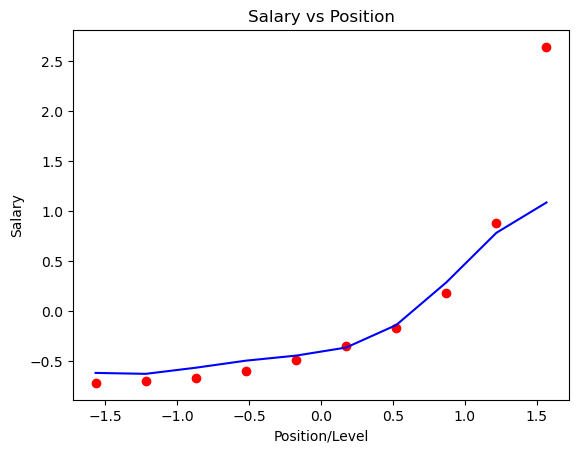

In [121]:
# Visualize
plt.scatter(X, y, color='red')
plt.plot(X, sv.predict(X), color='blue')
plt.xlabel("Position/Level")
plt.ylabel("Salary")
plt.title("Salary vs Position")
plt.show()

In [122]:
# scale it back
X_orig = sc_X.inverse_transform(X)
y_orig = sc_y.inverse_transform(y)

In [123]:
sv.predict(X)

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [124]:
sv.predict(X).shape

(10,)

In [125]:
sv.predict(X).reshape(-1,1)

array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

In [126]:
sv.predict(X).reshape(-1,1).shape

(10, 1)

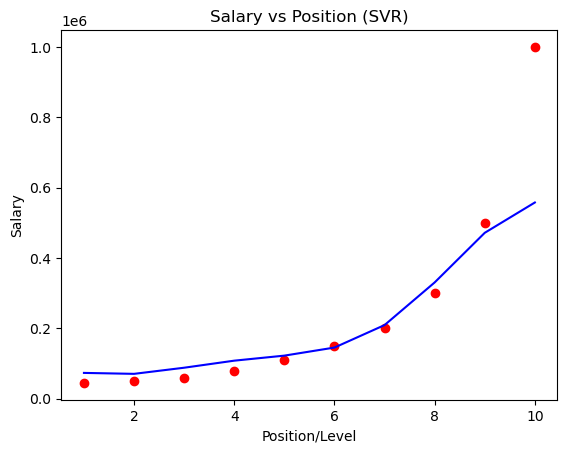

In [127]:
# Visualize
plt.scatter(X_orig, y_orig, color='red')
plt.plot(X_orig, sc_y.inverse_transform(sv.predict(X).reshape(-1,1)), color='blue')
plt.xlabel("Position/Level")
plt.ylabel("Salary")
plt.title("Salary vs Position (SVR)")
plt.show()

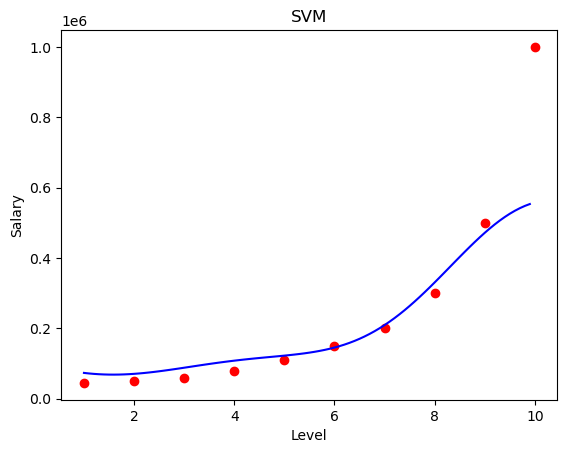

In [129]:
X_grid = np.arange(min(X_orig), max(X_orig), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# Transfrom the grid
#X_grid_Transformed = sc2.transform(X_grid)

plt.scatter(X_orig,y_orig, color='red')
plt.plot(X_grid, sc_y.inverse_transform(sv.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')

plt.xlabel("Level")
plt.ylabel('Salary')
plt.title("SVM")
plt.show()

In [ ]:
print(sc2.inverse_transform(sv.predict(X_grid_Transformed).reshape(-1,1)))

# Transfrom the grid
X_grid_Transformed = sc2.transform(X_grid)
# Predict
sv.predict(X_grid_Transformed)
# inverse back
sc2.inverse_transform(sv.predict(X_grid_Transformed).reshape(-1,1))
feature_polyconvertor.fit_transform(X_grid))